<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#epfl-数据集-(EPFL-Dataset)" data-toc-modified-id="epfl-数据集-(EPFL-Dataset)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>epfl 数据集 (EPFL Dataset)</a></span><ul class="toc-item"><li><span><a href="#读取图片-(Read-Images)" data-toc-modified-id="读取图片-(Read-Images)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>读取图片 (Read Images)</a></span></li><li><span><a href="#读取角度信息-(Read-Angles)" data-toc-modified-id="读取角度信息-(Read-Angles)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>读取角度信息 (Read Angles)</a></span></li><li><span><a href="#保存数据-(Save-Dataset)" data-toc-modified-id="保存数据-(Save-Dataset)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>保存数据 (Save Dataset)</a></span></li></ul></li><li><span><a href="#RGB图片-(Prepare-RGB-Image-Dataset)" data-toc-modified-id="RGB图片-(Prepare-RGB-Image-Dataset)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>RGB图片 (Prepare RGB Image Dataset)</a></span><ul class="toc-item"><li><span><a href="#保存数据-(Save-Dataset)" data-toc-modified-id="保存数据-(Save-Dataset)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>保存数据 (Save Dataset)</a></span></li></ul></li><li><span><a href="#灰度增强图片-(Dataset-for-Approach1)" data-toc-modified-id="灰度增强图片-(Dataset-for-Approach1)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>灰度增强图片 (Dataset for Approach1)</a></span><ul class="toc-item"><li><span><a href="#保存数据-(Save-Dataset)" data-toc-modified-id="保存数据-(Save-Dataset)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>保存数据 (Save Dataset)</a></span></li></ul></li><li><span><a href="#灰度增强图片_无标签学习-(Dataset-for-Approach2&amp;3)" data-toc-modified-id="灰度增强图片_无标签学习-(Dataset-for-Approach2&amp;3)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>灰度增强图片_无标签学习 (Dataset for Approach2&amp;3)</a></span><ul class="toc-item"><li><span><a href="#保存数据-(Save-Dataset)" data-toc-modified-id="保存数据-(Save-Dataset)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>保存数据 (Save Dataset)</a></span></li></ul></li><li><span><a href="#论文备图-(Images-for-the-Paper)" data-toc-modified-id="论文备图-(Images-for-the-Paper)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>论文备图 (Images for the Paper)</a></span></li></ul></div>

# epfl 数据集 (EPFL Dataset)

In [1]:
data_path = '/home/liucc/data/epfl_car/tripod-seq/'

## 读取图片 (Read Images)

In [13]:
import os
import numpy as np
import imageio

ims = []
boxes = []

for i in range(20):
    seq_id = f'{i+1}'
    seq_id = '0'*(2-len(seq_id))+seq_id
    bbox_path = data_path + f'bbox_{seq_id}.txt' 
          
    with open(bbox_path,'r') as f:
        bboxs = f.readlines()
    
    bboxs = [b.strip().split() for b in bboxs]
    bboxs = np.array([[float(b) for b in bs] for bs in bboxs])
    
    boxes.append(bboxs)
    
    im_num = np.size(bboxs,0)
    
    seqs = []
    for j in range(im_num):
        im_id = f'{j+1}'
        im_id = '0'*(3-len(im_id))+im_id
        im_path = data_path + f'tripod_seq_{seq_id}_{im_id}.jpg'
        
        im = imageio.imread(im_path)
        
        seqs.append(im)
    
    ims.append(seqs)

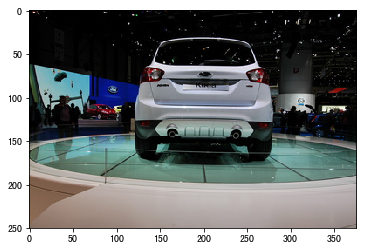

In [18]:
import matplotlib.pyplot as plt
plt.imshow(ims[0][0])
plt.show()

In [19]:
ims[0][0].shape

(250, 376, 3)

## 读取角度信息 (Read Angles)

In [45]:

with open(data_path+'tripod-seq.txt','r') as f:
    tseq = f.readlines()
    
angle_info = np.array([list(map(float,txt.strip().split())) for txt in tseq[-3:]],dtype=np.int)


In [46]:
angle_info

array([[109,  97, 105, 110,  79,  89, 122, 163,  93, 136,  81, 109, 106,
        134,  84, 126, 118, 108,  96,  72],
       [ 50,  75,   2, 107,  23,  46,  64,  93,  28,   6,  61,  13,  68,
        109,   4,  10,  63,  88,  51,  54],
       [  1,   1,   1,   1,  -1,   1,   1,   1,   1,  -1,  -1,  -1,   1,
         -1,  -1,  -1,   1,  -1,  -1,   1]])

In [47]:
with open(data_path+'times.txt','r') as f:
    tms = f.readlines()
    
secs = [np.array(list(map(int,txt.strip().split()))) for txt in tms]

In [48]:
secs[0][:10]

array([ 0,  1,  3,  6,  7,  8, 11, 12, 14, 19])

In [60]:
angles = []
for i in range(20):
    iterval = 360/secs[i][angle_info[0,i]-1]
    base = secs[i][angle_info[1,i]-1]
    direc = angle_info[2,i]
    
    aseqs = (secs[i]-base)*iterval*direc
    aseqs = np.mod(aseqs,360)
    
    angles.append(aseqs)
    

In [61]:
angles[0][:10]

array([176.37583893, 178.79194631, 183.62416107, 190.87248322,
       193.2885906 , 195.70469799, 202.95302013, 205.36912752,
       210.20134228, 222.28187919])

## 保存数据 (Save Dataset)

In [64]:
import pickle

data = {'images':ims,
        'boxes':boxes,
        'angles':angles}

with open('data/raw_data.dat','wb') as f:
    pickle.dump(data,f)

# RGB图片 (Prepare RGB Image Dataset)

In [49]:
import pickle
import numpy as np


with open('data/raw_data.dat','rb') as f:
    data = pickle.load(f)

In [50]:
from skimage.transform import resize
from skimage import img_as_ubyte
from skimage import filters 
from skimage import color,exposure
from skimage.filters import threshold_local

nwidth = 100

datan = []

for imseq,boxseq in zip(data['images'],data['boxes']):
    
    whr = []
    
    for i,(im,box) in enumerate(zip(imseq,boxseq)):
        c1,r1,width,height = box
        c2,r2 = c1+width,r1+height
        
        r1,c1,r2,c2 = int(r1),int(c1),int(r2),int(c2)
        
        imseq[i] = resize(im[r1:r2,c1:c2,:],[nwidth,nwidth],mode='constant',cval=0).astype(np.float32)
        

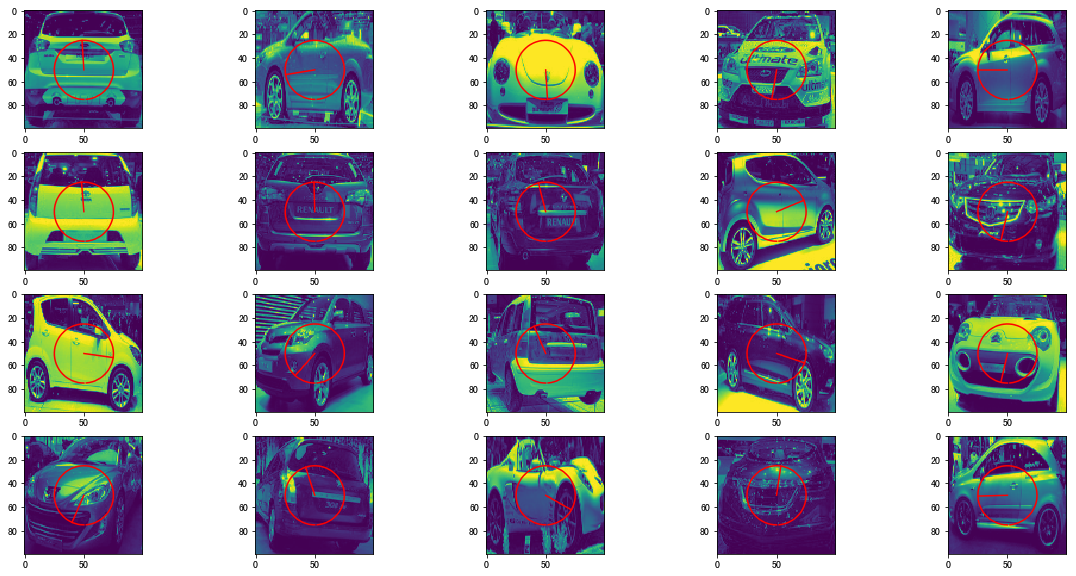

In [51]:
import matplotlib.pyplot as plt

figures,axes = plt.subplots(nrows=4,ncols=5,figsize=(20,10))

ww = np.size(data['images'][0][0],0)/2

t = np.arange(0,2*np.pi,0.1)
cir = np.vstack((-ww/2*np.sin(t)+ww,ww/2*np.cos(t)+ww))


for i,ax in enumerate(axes.reshape(20,)):
    ax.imshow(data['images'][i][0][:,:,0])
    ax.plot(cir[0,:],cir[1,:],color='red')
    
    ang = data['angles'][i][0]
    
    x1,y1,x2,y2 = ww,ww,-ww/2*np.sin(np.deg2rad(ang))+ww,ww/2*np.cos(np.deg2rad(ang))+ww
    
    ax.plot([x1,x2],[y1,y2],color="red")
    
plt.show()

## 保存数据 (Save Dataset)

In [52]:
import pickle

with open('data/rgb_data.dat','wb') as f:
    pickle.dump(data,f)

# 灰度增强图片 (Dataset for Approach1)

In [33]:
import pickle
import numpy as np


with open('data/raw_data.dat','rb') as f:
    data = pickle.load(f)

In [34]:
from skimage.transform import resize
from skimage import img_as_ubyte
from skimage import filters 
from skimage import color,exposure
from skimage.filters import threshold_local
from skimage import color,exposure
from skimage import transform as tf
from tqdm import tqdm_notebook as tqdm

neww = 100

wh_ratios = []

datan = {'train_x':[],
         'train_a':[],
         'train_r':[],
         'test_x':[[],[],[],[],[]],
         'test_a':[[],[],[],[],[]],
         'test_r':[[],[],[],[],[]]
        }

for j in tqdm(range(20)):
    ims_trn = []
    angles_trn = []
    whr = []
    if j==0:
        datan['eval_1'] = len(datan['train_x'])
        
    for im,box,angle in zip(data['images'][j],data['boxes'][j],data['angles'][j]):
        c1,r1,width,height = box
        c2,r2 = c1+width,r1+height
        
        (h,w,_) = im.shape
        
        im = im/255
                
        im_hsv = color.rgb2hsv(im)
        hh,ss,vv = im_hsv[:,:,0],im_hsv[:,:,1],im_hsv[:,:,2]
        hh = np.abs(hh)
        hh = np.where(hh>0.93,hh,0)
        im_red =  hh * ss * vv
        
               
        im_gray = color.rgb2gray(im)
        im_g = filters.scharr(im_gray)
        
        im = np.stack((im_red,im_gray,im_g),axis=2)
        
        #im = np.expand_dims(im,axis=2)
        
        
        r1,c1,r2,c2 = int(r1),int(c1),int(r2),int(c2)
        
        mv = min([5,r1,c1,h-r2,w-c2])
        
        mvs = np.array([[0,0,0,0],
                        [-mv,0,-mv,0],
                        [0,-mv,0,-mv],
                        [mv,0,mv,0],
                        [0,mv,0,mv]])
        
                
        for u in range(np.size(mvs,0)):
            rcs = np.array([r1,c1,r2,c2])+mvs[u,:]
            
            imn = im[rcs[0]:rcs[2],rcs[1]:rcs[3],:]
        
            imn = resize(imn,[neww,neww],mode='constant',cval=0)
            
            
                
            if j<10:
                datan['train_x'].append(imn)
                datan['train_a'].append(angle)
                datan['train_r'].append(height/width)
            else:
                datan['test_x'][u].append(imn)
                datan['test_a'][u].append(angle)
                datan['test_r'][u].append(height/width)
                
    if j==0:
        datan['eval_2'] = len(datan['train_x'])
        
            

datan['train_x'] = np.stack(datan['train_x'],axis=0)
datan['train_a'] = np.stack(datan['train_a'],axis=0)
datan['train_r'] = np.stack(datan['train_r'],axis=0)

print(datan['train_x'].shape,datan['train_a'].shape)

for i in range(5):
    datan['test_x'][i] = np.stack(datan['test_x'][i],axis=0)
    datan['test_a'][i] = np.stack(datan['test_a'][i],axis=0)
    datan['test_r'][i] = np.stack(datan['test_r'][i],axis=0)

/home/liucc/anaconda3/lib/python3.6/site-packages/skimage/color/colorconv.py:268: RuntimeWarning: divide by zero encountered in true_divide
  out_s = delta / out_v
/home/liucc/anaconda3/lib/python3.6/site-packages/skimage/color/colorconv.py:274: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = (arr[idx, 1] - arr[idx, 2]) / delta[idx]
/home/liucc/anaconda3/lib/python3.6/site-packages/skimage/color/colorconv.py:278: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 2. + (arr[idx, 2] - arr[idx, 0]) / delta[idx]
/home/liucc/anaconda3/lib/python3.6/site-packages/skimage/color/colorconv.py:282: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 4. + (arr[idx, 0] - arr[idx, 1]) / delta[idx]


(5895, 100, 100, 3) (5895,)


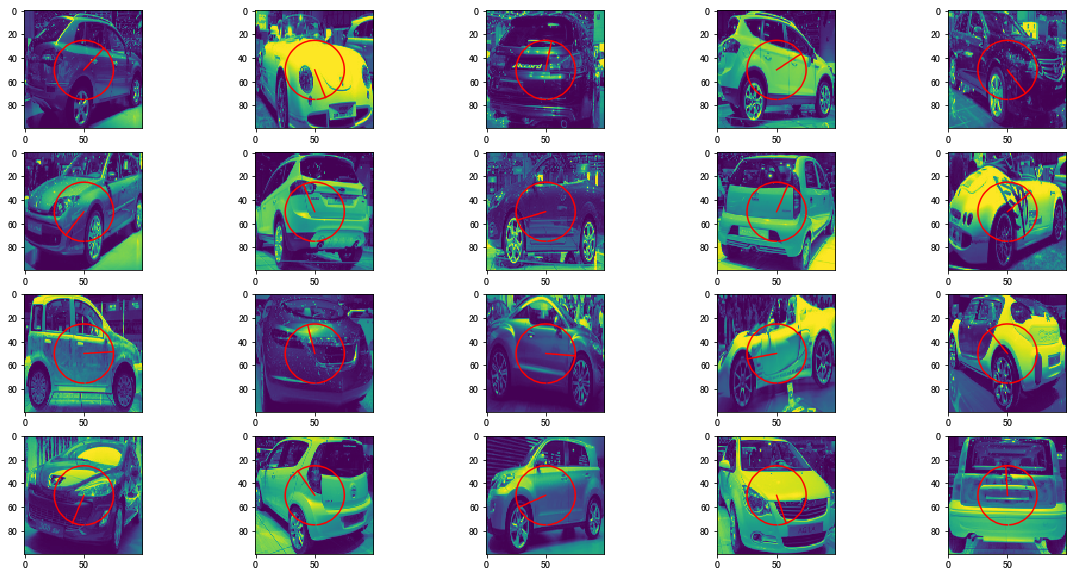

In [35]:
import matplotlib.pyplot as plt

figures,axes = plt.subplots(nrows=4,ncols=5,figsize=(20,10))

ww = np.size(datan['train_x'][0],0)/2

t = np.arange(0,2*np.pi,0.1)
cir = np.vstack((-ww/2*np.sin(t)+ww,ww/2*np.cos(t)+ww))


for i,ax in enumerate(axes.reshape(20,)):
    if i<10:
        lens = np.size(datan['train_x'],0)
        idx = np.random.permutation(lens)
        ax.imshow(datan['train_x'][idx[i],:,:,1])
        ax.plot(cir[0,:],cir[1,:],color='red')
    
        ang = datan['train_a'][idx[i]]
    
        x1,y1,x2,y2 = ww,ww,-ww/2*np.sin(np.deg2rad(ang))+ww,ww/2*np.cos(np.deg2rad(ang))+ww
    
        ax.plot([x1,x2],[y1,y2],color="red")
    else:
        lens = np.size(datan['test_x'][0],0)
        idx = np.random.permutation(lens)
        ax.imshow(datan['test_x'][0][idx[i],:,:,1])
        ax.plot(cir[0,:],cir[1,:],color='red')
    
        ang = datan['test_a'][0][idx[i]]
    
        x1,y1,x2,y2 = ww,ww,-ww/2*np.sin(np.deg2rad(ang))+ww,ww/2*np.cos(np.deg2rad(ang))+ww
    
        ax.plot([x1,x2],[y1,y2],color="red")
    
plt.show()

## 保存数据 (Save Dataset)

In [37]:
import pickle

with open('data/gray_aug_data.dat','wb') as f:
    pickle.dump(datan,f)

# 灰度增强图片_无标签学习 (Dataset for Approach2&3)

In [45]:
import pickle
import numpy as np


with open('data/raw_data.dat','rb') as f:
    data = pickle.load(f)

In [46]:
def augment_im(im,angle,r1,r2,c1,c2,width,height):
    mv = min([5,r1,c1,h-r2,w-c2])
        
    mvs = np.array([[0,0,0,0],
                    [-mv,0,-mv,0],
                    [0,-mv,0,-mv],
                    [mv,0,mv,0],
                    [0,mv,0,mv]])

    item = {'im':[],
            'ag':[],
            'ra':[]}
    
    for u in range(np.size(mvs,0)):
        rcs = np.array([r1,c1,r2,c2])+mvs[u,:]

        imn = im[rcs[0]:rcs[2],rcs[1]:rcs[3],:]

        imn = resize(imn,[neww,neww],mode='constant',cval=0)

        item['im'].append(imn)
        item['ag'].append(angle)
        item['ra'].append(height/width)
        
    return item

def get_item(im,box,angle):
    c1,r1,width,height = box
    c2,r2 = c1+width,r1+height

    (h,w,_) = im.shape

    im = im/255

    im_hsv = color.rgb2hsv(im)
    hh,ss,vv = im_hsv[:,:,0],im_hsv[:,:,1],im_hsv[:,:,2]
    hh = np.abs(hh)
    hh = np.where(hh>0.93,hh,0)
    im_red =  hh * ss * vv


    im_gray = color.rgb2gray(im)
    im_g = filters.scharr(im_gray)

    im = np.stack((im_red,im_gray,im_g),axis=2)

    r1,c1,r2,c2 = int(r1),int(c1),int(r2),int(c2)

    item = augment_im(im,angle,r1,r2,c1,c2,width,height)
    
    return item

In [47]:
from skimage.transform import resize
from skimage import img_as_ubyte
from skimage import filters 
from skimage import color,exposure
from skimage.filters import threshold_local
from skimage import color,exposure
from skimage import transform as tf
from tqdm import tqdm_notebook as tqdm

neww = 100

wh_ratios = []

datan = {
         'label':[],
         'unlabel':[],
         'test':[],
        }

num_gap = 10
min_seq = 10
max_seq = 20
num_seq = 10

#labeled data
for i in tqdm(range(10)):
    for j in range(0,len(data['images'][i]),num_gap):
        item = get_item(data['images'][i][j],data['boxes'][i][j],data['angles'][i][j])
        datan['label'].append(item)

#unlabeled data
for i in tqdm(range(10)):
    car_num = len(data['images'][i])
    for u in range(num_seq):
        unlabel_seq = []
        
        seq1 = np.random.randint(1,car_num-max_seq+1)
        seq_num = np.random.randint(min_seq,max_seq+1)
        seq2 = seq1+seq_num

        dir_ctr = 0
        for j in range(seq1,seq2):
            item = get_item(data['images'][i][j],data['boxes'][i][j],data['angles'][i][j])
            unlabel_seq.append(item)
            
            dir_ctr = dir_ctr+1 if data['angles'][i][j]>data['angles'][i][j-1] else dir_ctr-1

        #正方向
        if dir_ctr>0:
            datan['unlabel'].append(unlabel_seq)
        #负方向
        else:
            datan['unlabel'].append(unlabel_seq[-1::-1])
            
#test data
for i in tqdm(range(10,20)):
    for j in range(len(data['images'][i])):
        item = get_item(data['images'][i][j],data['boxes'][i][j],data['angles'][i][j])
        datan['test'].append(item)
        
print(len(datan['label']),len(datan['unlabel']),len(datan['test']))

/home/liucc/anaconda3/lib/python3.6/site-packages/skimage/color/colorconv.py:268: RuntimeWarning: divide by zero encountered in true_divide
  out_s = delta / out_v
/home/liucc/anaconda3/lib/python3.6/site-packages/skimage/color/colorconv.py:274: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = (arr[idx, 1] - arr[idx, 2]) / delta[idx]
/home/liucc/anaconda3/lib/python3.6/site-packages/skimage/color/colorconv.py:278: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 2. + (arr[idx, 2] - arr[idx, 0]) / delta[idx]
/home/liucc/anaconda3/lib/python3.6/site-packages/skimage/color/colorconv.py:282: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 4. + (arr[idx, 0] - arr[idx, 1]) / delta[idx]


123 100 1120


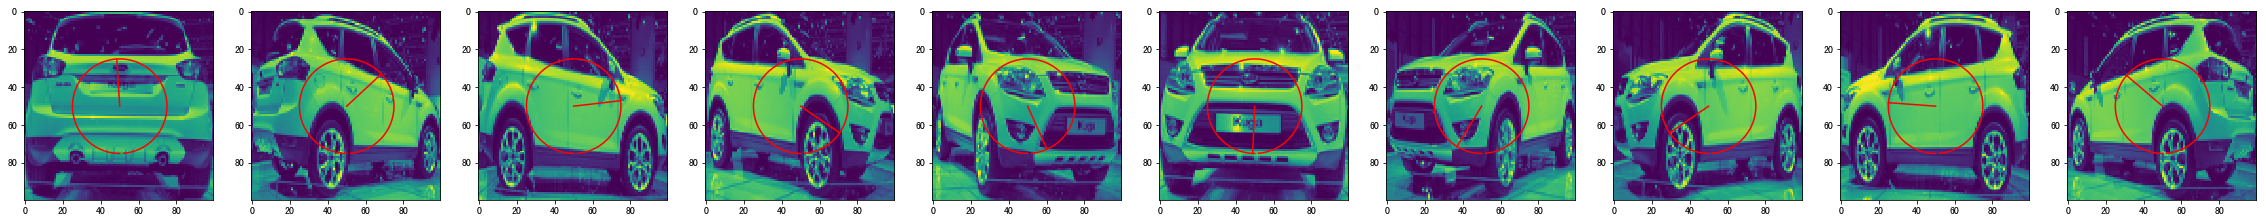

In [42]:
import matplotlib.pyplot as plt

figures,axes = plt.subplots(nrows=1,ncols=10,figsize=(40,5))

ww = np.size(datan['label'][0]['im'][0],0)/2

t = np.arange(0,2*np.pi,0.1)
cir = np.vstack((-ww/2*np.sin(t)+ww,ww/2*np.cos(t)+ww))


for i,ax in enumerate(axes):
    
    ax.imshow(datan['label'][i]['im'][0][:,:,1])
    ax.plot(cir[0,:],cir[1,:],color='red')

    ang = datan['label'][i]['ag'][0]

    x1,y1,x2,y2 = ww,ww,-ww/2*np.sin(np.deg2rad(ang))+ww,ww/2*np.cos(np.deg2rad(ang))+ww

    ax.plot([x1,x2],[y1,y2],color="red")
    
    
plt.show()

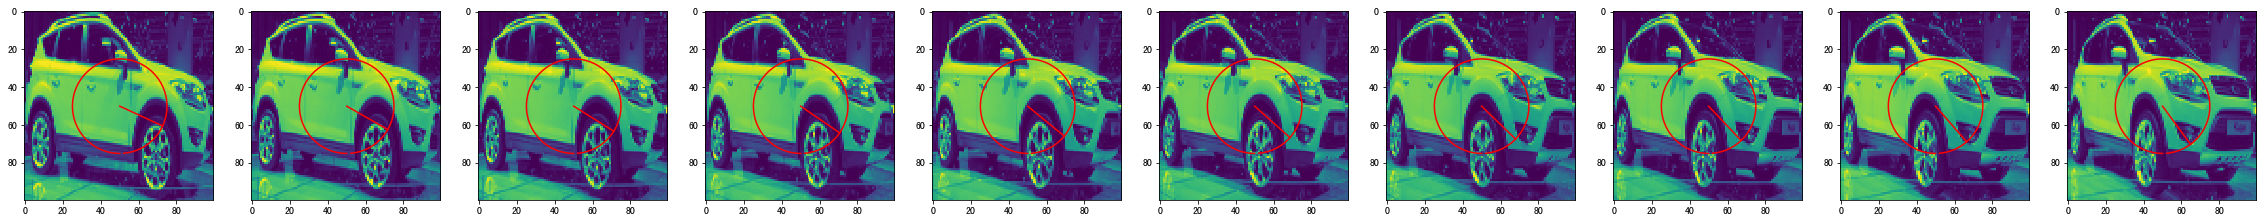

In [43]:
import matplotlib.pyplot as plt

figures,axes = plt.subplots(nrows=1,ncols=10,figsize=(40,5))

ww = np.size(datan['label'][0]['im'][0],0)/2

t = np.arange(0,2*np.pi,0.1)
cir = np.vstack((-ww/2*np.sin(t)+ww,ww/2*np.cos(t)+ww))


for i,ax in enumerate(axes):
    
    ax.imshow(datan['unlabel'][0][i]['im'][0][:,:,1])
    ax.plot(cir[0,:],cir[1,:],color='red')

    ang = datan['unlabel'][0][i]['ag'][0]

    x1,y1,x2,y2 = ww,ww,-ww/2*np.sin(np.deg2rad(ang))+ww,ww/2*np.cos(np.deg2rad(ang))+ww

    ax.plot([x1,x2],[y1,y2],color="red")
    
    
plt.show()

## 保存数据 (Save Dataset)

In [48]:
import pickle

with open('data/gray_aug_unlabel_data.dat','wb') as f:
    pickle.dump(datan,f)

# 论文备图 (Images for the Paper)

In [51]:
import pickle
import numpy as np


with open('data/raw_data.dat','rb') as f:
    data = pickle.load(f)

In [57]:

def get_item(im,box):
    c1,r1,width,height = box
    c2,r2 = c1+width,r1+height

    (h,w,_) = im.shape

    im = im/255

    im_hsv = color.rgb2hsv(im)
    hh,ss,vv = im_hsv[:,:,0],im_hsv[:,:,1],im_hsv[:,:,2]
    hh = np.abs(hh)
    hh = np.where(hh>0.93,hh,0)
    im_red =  hh * ss * vv


    im_gray = color.rgb2gray(im)
    im_g = filters.scharr(im_gray)

    im = np.stack((im_red,im_gray,im_g),axis=2)

    r1,c1,r2,c2 = int(r1),int(c1),int(r2),int(c2)
    
    im = im[r1:r2,c1:c2]
    
    imn = resize(im,[neww,neww],mode='constant',cval=0)

    return imn

/home/liucc/anaconda3/lib/python3.6/site-packages/skimage/color/colorconv.py:268: RuntimeWarning: divide by zero encountered in true_divide
  out_s = delta / out_v
/home/liucc/anaconda3/lib/python3.6/site-packages/skimage/color/colorconv.py:274: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = (arr[idx, 1] - arr[idx, 2]) / delta[idx]
/home/liucc/anaconda3/lib/python3.6/site-packages/skimage/color/colorconv.py:278: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 2. + (arr[idx, 2] - arr[idx, 0]) / delta[idx]
/home/liucc/anaconda3/lib/python3.6/site-packages/skimage/color/colorconv.py:282: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 4. + (arr[idx, 0] - arr[idx, 1]) / delta[idx]


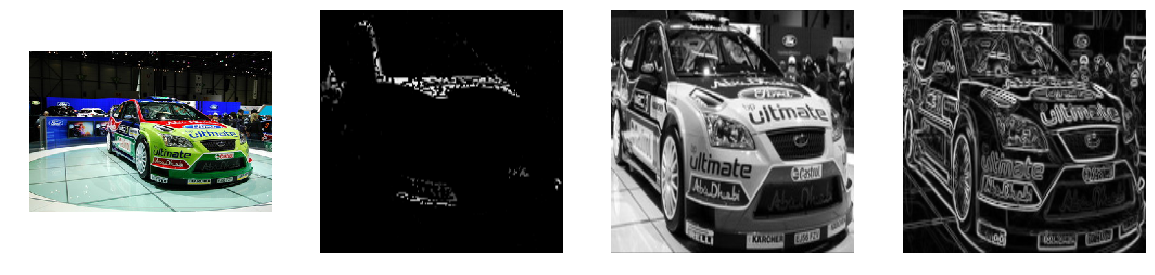

In [61]:
from skimage.transform import resize
from skimage import img_as_ubyte
from skimage import filters 
from skimage import color,exposure
from skimage.filters import threshold_local
from skimage import color,exposure
from skimage import transform as tf
import matplotlib.pyplot as plt

im = data['images'][3][99]
boxes = data['boxes'][3][99]
imn = get_item(im,boxes)

_,axes = plt.subplots(ncols=4,figsize=(20,5))

axes[0].imshow(im)
axes[1].imshow(imn[:,:,0],cmap='gray')
axes[2].imshow(imn[:,:,1],cmap='gray')
axes[3].imshow(imn[:,:,2],cmap='gray')
[ax.axis('off') for ax in axes]

plt.show()